In [77]:
import numpy as np
import sympy as sp
from matplotlib import pyplot as plt

g = 9.81
R = 1
m = 1
dt = 0.01
N = 1000
t0 = 0
y0 = [np.pi * 4/180, 0]     # warunki początkowe

tn = N * dt
t = np.linspace(t0, tn, N)  # punkty siatki czasowej
y = np.zeros((N, 2))        # wektor rozwiązań numerycznych
y[0, :] = y0                # wartości początkowe

In [78]:
def RK4(k, dt, t, y):
    """
    Metoda RK4 do rozwiązywania układów równań różniczkowych.
    """
    for i in range(1, len(t)):
        k1 = k(t[i-1], y[i-1, :])
        k2 = k(t[i-1] + dt/2, y[i-1, :] + dt*k1/2)
        k3 = k(t[i-1] + dt/2, y[i-1, :] + dt*k2/2)
        k4 = k(t[i-1] + dt, y[i-1, :] + dt*k3)
        y[i, :] = y[i-1, :] + dt/6 * (k1 + 2*k2 + 2*k3 + k4)

    return y


def k(t, y):
    """
    Funkcja zwracająca wektor pochodnych funkcji y(t) dla układu równań różniczkowych.
    """
    y1, y2 = y[0], y[1]
    f1 = y2
    f2 = -g/R * sp.N(sp.sin(y1))
    return np.array([f1, f2])

y = RK4(k, dt, t, y)

In [79]:
C, omega, T = sp.symbols('C omega t')
eq = C*sp.cos(omega*T)
values = [(omega, sp.sqrt(g/R)), (C, y0[0])]
eq_val = eq.subs(values)
v = sp.diff(eq_val, T)
z = np.zeros((N, 2))

for i in range(0, len(t)):
    z[i,0] = sp.N(eq_val.subs(T,t[i]))
    z[i,1] = sp.N(v.subs(T,t[i]))

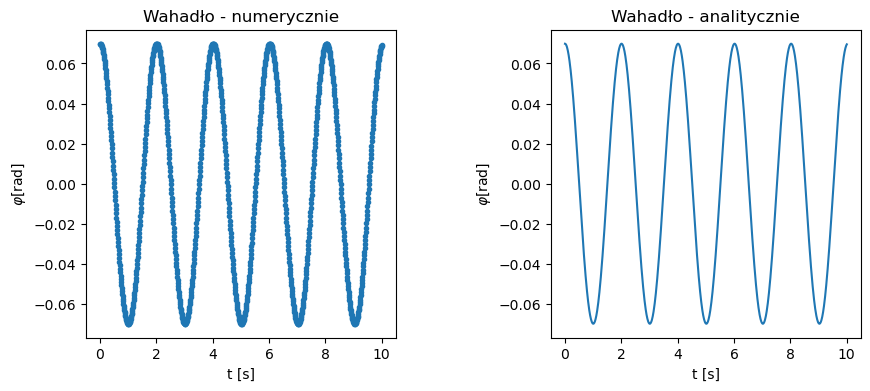

In [163]:
fig, axs = plt.subplots(ncols=2, figsize=(10, 4))

axs[0].plot(t, y[:, 0],marker='.')
axs[0].set_xlabel('t [s]')
axs[0].set_ylabel(r'$\varphi $[rad]')
axs[0].set_title('Wahadło - numerycznie')

axs[1].plot(t, z[:, 0])
axs[1].set_xlabel('t [s]')
axs[1].set_ylabel(r'$\varphi $[rad]')
axs[1].set_title('Wahadło - analitycznie')

plt.subplots_adjust(wspace=0.5)
plt.show()

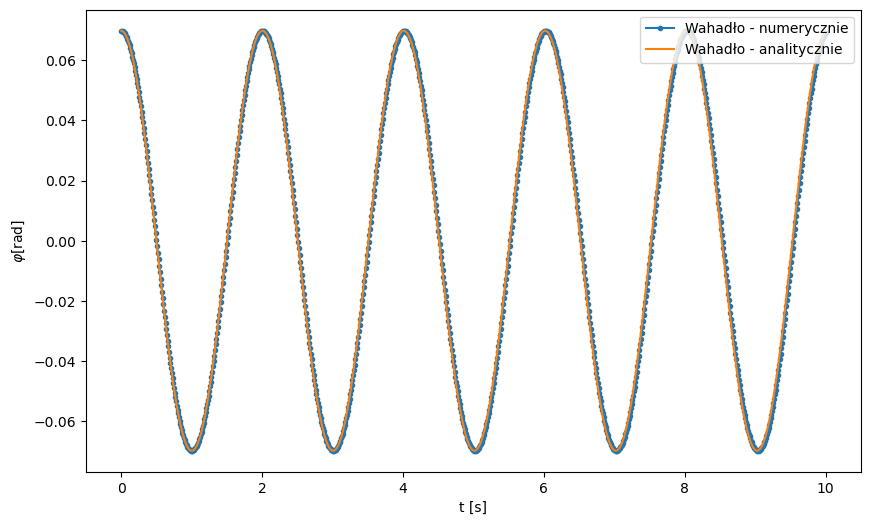

In [170]:
plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0], label='Wahadło - numerycznie',marker='.')
plt.plot(t, z[:, 0], label='Wahadło - analitycznie')

plt.xlabel('t [s]')
plt.ylabel(r'$\varphi $[rad]')
plt.legend(loc='upper right')
#plt.title('Wykres funkcji wychylenia wahadła w zależności od czasu')
plt.show()

In [82]:
y = np.zeros((N, 2))
y[0, :] = [np.pi * 4/180, 0]
y = RK4(k, dt, t, y)
################################################
y1 = np.zeros((N, 2))
z1 = np.zeros((N, 2))
y1[0, :] = [np.pi * 45/180, 0]
y1 = RK4(k, dt, t, y1)
values = [(omega, sp.sqrt(g/R)), (C, y1[0,0])]
eq_val = eq.subs(values)
v1 = sp.diff(eq_val, T)

for i in range(0, len(t)):
    z1[i,0] = sp.N(eq_val.subs(T,t[i]))
    z1[i,1] = sp.N(v1.subs(T,t[i]))
################################################
y2 = np.zeros((N, 2))
z2 = np.zeros((N, 2))
y2[0, :] = [np.pi * 90/180, 0]
y2 = RK4(k, dt, t, y2)
values = [(omega, sp.sqrt(g/R)), (C, y2[0,0])]
eq_val = eq.subs(values)
v2 = sp.diff(eq_val, T)

for i in range(0, len(t)):
    z2[i,0] = sp.N(eq_val.subs(T,t[i]))
    z2[i,1] = sp.N(v2.subs(T,t[i]))
################################################
y3 = np.zeros((N, 2))
z3 = np.zeros((N, 2))
y3[0, :] = [np.pi * 135/180, 0]
y3 = RK4(k, dt, t, y3)
values = [(omega, sp.sqrt(g/R)), (C, y3[0,0])]
eq_val = eq.subs(values)
v3 = sp.diff(eq_val, T)

for i in range(0, len(t)):
    z3[i,0] = sp.N(eq_val.subs(T,t[i]))
    z3[i,1] = sp.N(v3.subs(T,t[i]))
################################################
y4 = np.zeros((N, 2))
z4 = np.zeros((N, 2))
y4[0, :] = [np.pi * 175/180, 0]
y4 = RK4(k, dt, t, y4)
values = [(omega, sp.sqrt(g/R)), (C, y4[0,0])]
eq_val = eq.subs(values)
v4 = sp.diff(eq_val, T)

for i in range(0, len(t)):
    z4[i,0] = sp.N(eq_val.subs(T,t[i]))
    z4[i,1] = sp.N(v4.subs(T,t[i]))

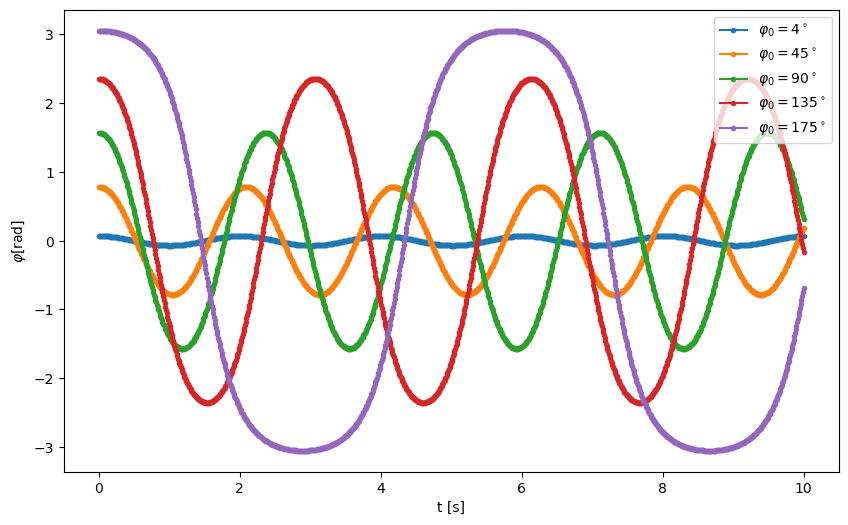

In [171]:
plt.figure(figsize=(10, 6))
plt.plot(t, y[:, 0],  label=r'$\varphi_0 = 4^\circ$',marker='.')
plt.plot(t, y1[:, 0], label=r'$\varphi_0 = 45^\circ$',marker='.')
plt.plot(t, y2[:, 0], label=r'$\varphi_0 = 90^\circ$',marker='.')
plt.plot(t, y3[:, 0], label=r'$\varphi_0 = 135^\circ$',marker='.')
plt.plot(t, y4[:, 0], label=r'$\varphi_0 = 175^\circ$',marker='.')
plt.xlabel('t [s]')
plt.ylabel(r'$\varphi $[rad]')
plt.legend(loc='upper right')
#plt.title('Wykres funkcji wychylenia wahadła w zależności od czasu')
plt.show()

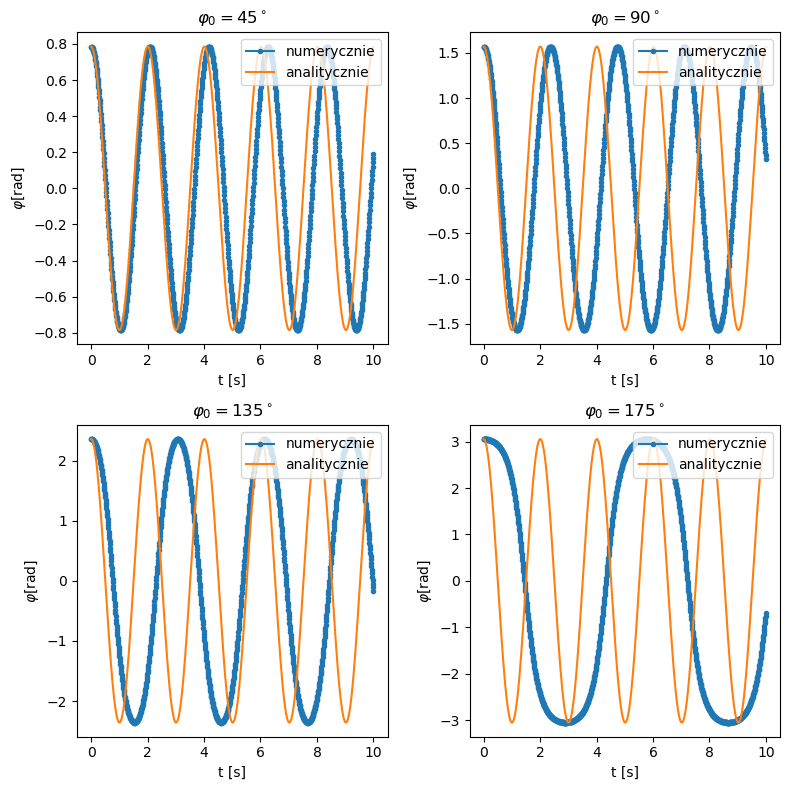

In [166]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

# pierwszy wykres
axs[0, 0].plot(t, y1[:,0], label='numerycznie',marker='.')
axs[0, 0].plot(t, z1[:,0], label='analitycznie')
axs[0, 0].set_xlabel('t [s]')
axs[0, 0].set_ylabel(r'$\varphi $[rad]')
axs[0, 0].set_title(r'$\varphi_0 = 45^\circ$')
axs[0, 0].legend(loc='upper right')

# drugi wykres
axs[0, 1].plot(t, y2[:,0], label='numerycznie',marker='.')
axs[0, 1].plot(t, z2[:,0], label='analitycznie')
axs[0, 1].set_xlabel('t [s]')
axs[0, 1].set_ylabel(r'$\varphi $[rad]')
axs[0, 1].set_title(r'$\varphi_0 = 90^\circ$')
axs[0, 1].legend(loc='upper right')

# trzeci wykres
axs[1, 0].plot(t, y3[:,0], label='numerycznie',marker='.')
axs[1, 0].plot(t, z3[:,0], label='analitycznie')
axs[1, 0].set_xlabel('t [s]')
axs[1, 0].set_ylabel(r'$\varphi $[rad]')
axs[1, 0].set_title(r'$\varphi_0 = 135^\circ$')
axs[1, 0].legend(loc='upper right')

# czwarty wykres
axs[1, 1].plot(t, y4[:,0], label='numerycznie',marker='.')
axs[1, 1].plot(t, z4[:,0], label='analitycznie')
axs[1, 1].set_xlabel('t [s]')
axs[1, 1].set_ylabel(r'$\varphi $[rad]')
axs[1, 1].set_title(r'$\varphi_0 = 175^\circ$')
axs[1, 1].legend(loc='upper right')

plt.tight_layout()
plt.show()

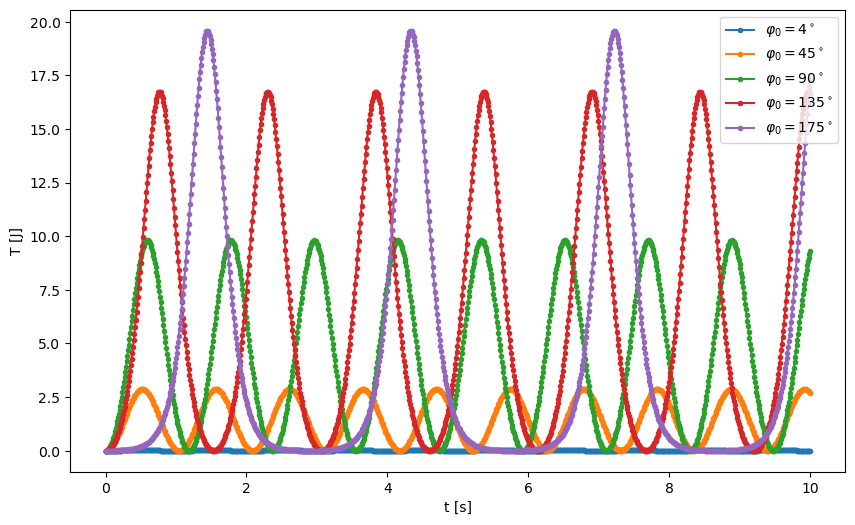

In [172]:
#Energia kinetyczna
T = 0.5 * m * y[:, 1]**2
T1 = 0.5 * m * y1[:, 1]**2
T2 = 0.5 * m * y2[:, 1]**2
T3 = 0.5 * m * y3[:, 1]**2
T4 = 0.5 * m * y4[:, 1]**2

plt.figure(figsize=(10, 6))
plt.plot(t, T[:],  label=r'$\varphi_0 = 4^\circ$',marker='.')
plt.plot(t, T1[:], label=r'$\varphi_0 = 45^\circ$',marker='.')
plt.plot(t, T2[:], label=r'$\varphi_0 = 90^\circ$',marker='.')
plt.plot(t, T3[:], label=r'$\varphi_0 = 135^\circ$',marker='.')
plt.plot(t, T4[:], label=r'$\varphi_0 = 175^\circ$',marker='.')
plt.xlabel('t [s]')
plt.ylabel('T [J]')
plt.legend(loc='upper right')
#plt.title('Wykres funkcji energii kinetycznej wahadła w zależności od czasu')
plt.show()

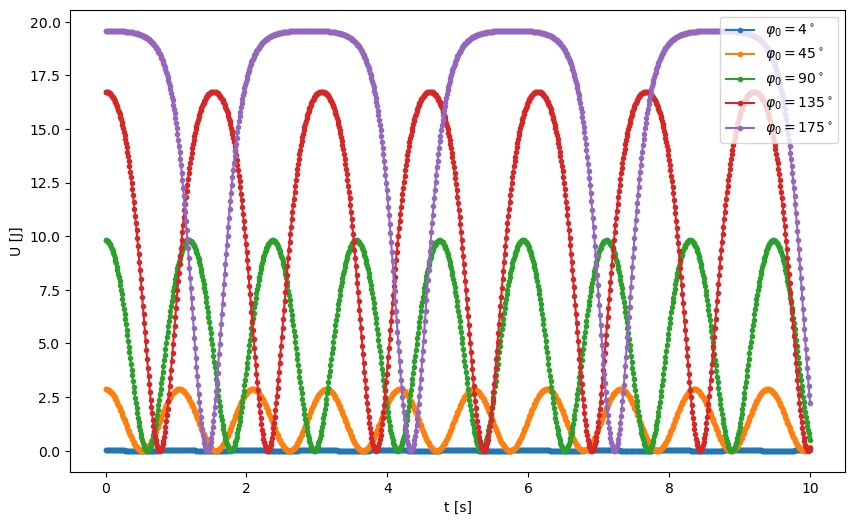

In [173]:
#Energia potencjalna
U = m * g * R * (1 - np.cos(y[:, 0]))
U1 = m * g * R * (1 - np.cos(y1[:, 0]))
U2 = m * g * R * (1 - np.cos(y2[:, 0]))
U3 = m * g * R * (1 - np.cos(y3[:, 0]))
U4 = m * g * R * (1 - np.cos(y4[:, 0]))

plt.figure(figsize=(10, 6))
plt.plot(t, U[:],  label=r'$\varphi_0 = 4^\circ$',marker='.')
plt.plot(t, U1[:], label=r'$\varphi_0 = 45^\circ$',marker='.')
plt.plot(t, U2[:], label=r'$\varphi_0 = 90^\circ$',marker='.')
plt.plot(t, U3[:], label=r'$\varphi_0 = 135^\circ$',marker='.')
plt.plot(t, U4[:], label=r'$\varphi_0 = 175^\circ$',marker='.')
plt.xlabel('t [s]')
plt.ylabel('U [J]')
plt.legend(loc='upper right')
#plt.title('Wykres funkcji energii potencjalnej wahadła w zależności od czasu')
plt.show()

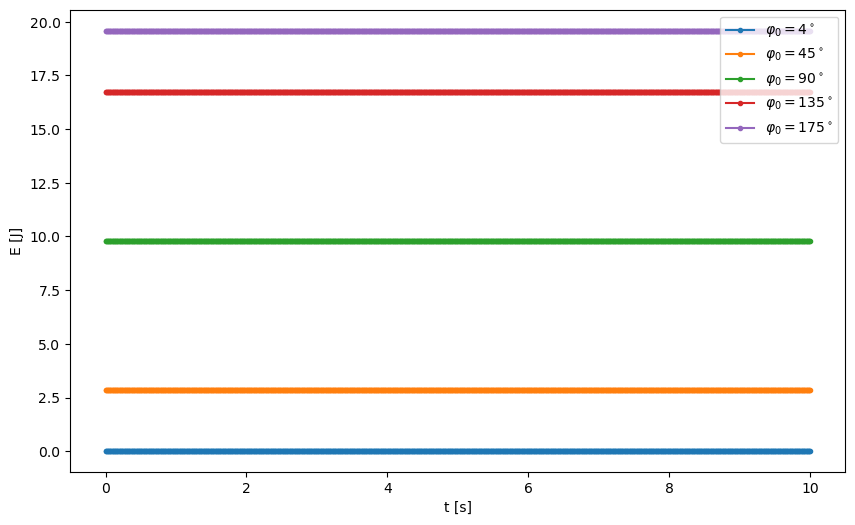

In [174]:
E  = T  + U
E1 = T1 + U1
E2 = T2 + U2
E3 = T3 + U3
E4 = T4 + U4

plt.figure(figsize=(10, 6))
plt.plot(t, E[:],  label=r'$\varphi_0 = 4^\circ$',marker='.')
plt.plot(t, E1[:], label=r'$\varphi_0 = 45^\circ$',marker='.')
plt.plot(t, E2[:], label=r'$\varphi_0 = 90^\circ$',marker='.')
plt.plot(t, E3[:], label=r'$\varphi_0 = 135^\circ$',marker='.')
plt.plot(t, E4[:], label=r'$\varphi_0 = 175^\circ$',marker='.')
plt.xlabel('t [s]')
plt.ylabel('E [J]')
plt.legend(loc='upper right')
#plt.title('Wykres funkcji energii całkowitej wahadła w zależności od czasu')
plt.show()

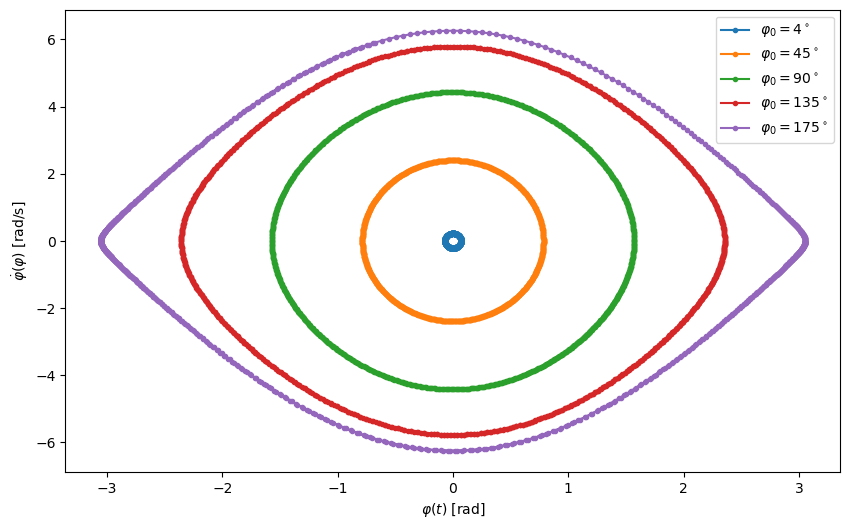

In [178]:
plt.figure(figsize=(10, 6))
plt.plot(y[:, 0],  y[:, 1],   label=r'$\varphi_0 = 4^\circ$',marker='.')
plt.plot(y1[:, 0], y1[:, 1], label=r'$\varphi_0 = 45^\circ$',marker='.')
plt.plot(y2[:, 0], y2[:, 1], label=r'$\varphi_0 = 90^\circ$',marker='.')
plt.plot(y3[:, 0], y3[:, 1], label=r'$\varphi_0 = 135^\circ$',marker='.')
plt.plot(y4[:, 0], y4[:, 1], label=r'$\varphi_0 = 175^\circ$',marker='.')
plt.xlabel(r'$\varphi(t)$ [rad]')
plt.ylabel(r'$\dot{\varphi}(\varphi)\ [\mathrm{rad/s}]$')
plt.legend(loc='upper right')
#plt.title('Trajektoria wahadła w przestrzeni konfiguracyjnej')
plt.show()

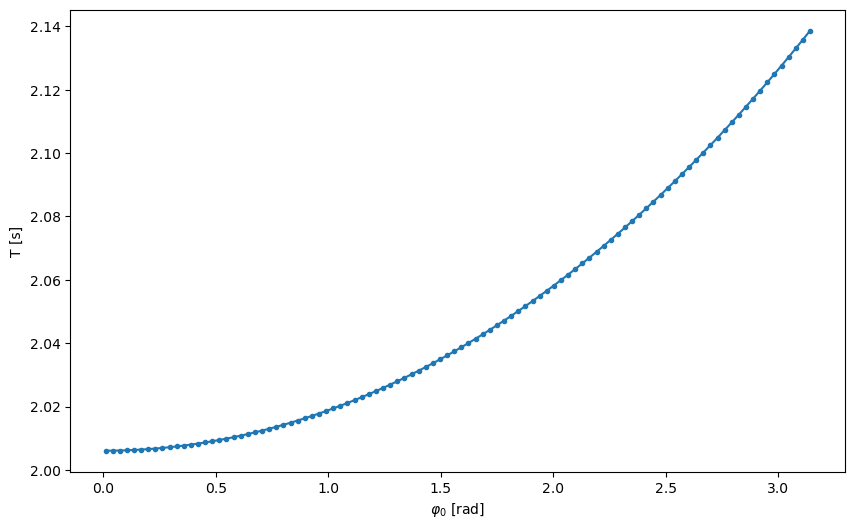

In [181]:
plt.figure(figsize=(10, 6))
def pendulum_period(phi0):
    T = 2*np.pi*np.sqrt(R/g)*(1 + 1/16*(phi0/np.pi)**2 + 11/3072*(phi0/np.pi)**4)
    return T

phi_vals = np.linspace(0.01, np.pi, 100)
T_vals = pendulum_period(phi_vals)

plt.plot(phi_vals, T_vals,marker='.')
plt.xlabel(r'$\varphi_0$ [rad]')
plt.ylabel('T [s]')
#plt.title('Wykres funkcji okresu wahadła w zależności od maksymalnego wychylenia')
plt.show()
